# Ocean warming

Derive estimates of the 2015 deep ocean layer temperature of the two layer model from the AR6 constrained emulator, for another project.

I'll use the chapter 9 (anthro-only) projections because I didn't save out deep ocean temperature for chapter 7.

Theme Song: Behind The Black Door<br>
Artist: Uninvited<br>
Year: 2021

In [1]:
from ar6.utils.h5 import *
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

In [2]:
results = load_dict_from_hdf5('../data_output_large/chapter9/twolayer_historical-AR6.h5')

In [3]:
results['historical-AR6'].keys()

dict_keys(['ECS', 'TCR', 'cdeep', 'cmix', 'deep_ocean_temperature', 'effective_radiative_forcing', 'efficacy', 'eta', 'lambda0', 'net_energy_imbalance', 'ocean_heat_content', 'surface_temperature'])

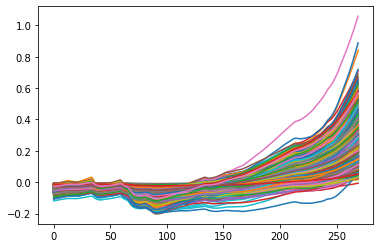

In [4]:
pl.plot(results['historical-AR6']['deep_ocean_temperature']);

In [5]:
tocean2015 = results['historical-AR6']['deep_ocean_temperature'][260:270, :].mean(axis=0) - results['historical-AR6']['deep_ocean_temperature'][100:151, :].mean(axis=0)

(array([183., 765., 728., 343., 157.,  46.,  11.,   1.,   2.,   1.]),
 array([0.02013471, 0.11596798, 0.21180125, 0.30763453, 0.4034678 ,
        0.49930107, 0.59513435, 0.69096762, 0.78680089, 0.88263417,
        0.97846744]),
 <a list of 10 Patch objects>)

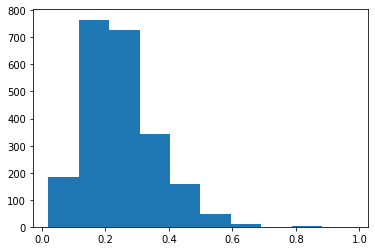

In [6]:
pl.hist(tocean2015)

In [7]:
print(np.mean(tocean2015))
print(np.median(tocean2015))

0.2484209038929589
0.23081895062346885


In [8]:
df = pd.DataFrame(tocean2015, columns=['deep_ocean_warming_2015'])

In [9]:
df.to_csv('../data_output/tlm_lower_layer_warming_2015v1850-1900.csv', index=False)